In [83]:
#Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import linalg as la
from typing import List


In [85]:
#Read data set and fill/drop na values 
data_raw = pd.read_csv('example_ms.csv')
data_ff = data_raw.fillna(method = 'ffill')
data_bf = data_ff.fillna(method = 'bfill')
data = data_bf.dropna()

#Convert date column to datetime and index by date
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()
#print(data['date'].dtype)

C:\Users\erica\AppData\Local\Temp\ipykernel_10520\229385056.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ff = data_raw.fillna(method = 'ffill')
C:\Users\erica\AppData\Local\Temp\ipykernel_10520\229385056.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bf = data_ff.fillna(method = 'bfill')


,ticker,open,high,low,close,volume,open_interest,ema_close_8,ema_close_16,ema_close_32,...,rolling_hurst_exp_252,rolling_hurst_exp_504,adaptive_kernel_trend,kernel_momentum_div,kernel_slope,ema_spread_16_64,cmse_100,spectral_entropy,wavelet_mom,close_volatility_20
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,BP00-USA,1.6118,1.6235,1.6052,1.6085,107463,81371,1.607138,1.615475,1.597597,...,0.651458,0.638245,0.0,0,0.0465,-0.043083,6.30469,0.250255,0.005422,0.005073
2010-01-05,BP00-USA,1.6086,1.6148,1.5958,1.5992,102364,88847,1.607138,1.615475,1.597597,...,0.651458,0.638245,0.0,0,0.0465,-0.043083,6.30469,0.250255,0.005422,0.005073
2010-01-06,BP00-USA,1.5983,1.6059,1.5930,1.5992,106163,92191,1.607138,1.615475,1.597597,...,0.651458,0.638245,0.0,0,0.0465,-0.043083,6.30469,0.250255,0.005422,0.005073
2010-01-07,BP00-USA,1.5998,1.6052,1.5890,1.5935,90873,93464,1.607138,1.615475,1.597597,...,0.651458,0.638245,0.0,0,0.0465,-0.043083,6.30469,0.250255,0.005422,0.005073
2010-01-08,BP00-USA,1.5924,1.6105,1.5908,1.6027,122147,89496,1.607138,1.615475,1.597597,...,0.651458,0.638245,0.0,0,0.0465,-0.043083,6.30469,0.250255,0.005422,0.005073


In [87]:
#set list of lookback periods from 2 to 20 days
rsi_periods = list(range(2,21))

#initialize rsis dataframe
rsis = pd.DataFrame(index = data.index)

#function to calculate RSI = 100 - (100/(1 + RS))
def calculate_rsi(close, period):
    #calculate differences between closing prices for each row and then find the gains and losses 
    price_change = data['close'].diff()
    gains = (price_change.where(price_change > 0, 0))
    loss = (-price_change.where(price_change < 0, 0)) 

    #find the average gains and losses
    average_gains = gains.rolling(window = period, min_periods = 1).mean()
    average_losses = loss.rolling(window = period, min_periods = 1).mean()
    #rs calculation
    rs = average_gains / average_losses
    #rsi calculation
    rsi = 100 - (100/(1 + rs))
    return rsi

for period in rsi_periods: 
    rsis[f'RSI_{period}'] = calculate_rsi(data['close'], period)

rsis

,RSI_2,RSI_3,RSI_4,RSI_5,RSI_6,RSI_7,RSI_8,RSI_9,RSI_10,RSI_11,RSI_12,RSI_13,RSI_14,RSI_15,RSI_16,RSI_17,RSI_18,RSI_19,RSI_20
date,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,61.744966,61.744966,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529,38.016529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11,83.073955,38.533994,63.822624,71.134690,69.204095,53.258305,56.799333,62.314752,61.311964,62.696965,62.866235,64.750057,66.158877,65.880111,69.144308,68.580858,71.629058,74.541769,77.109816
2025-02-12,69.598381,87.800941,47.898544,67.283644,73.381479,71.541036,56.036582,59.183341,64.141758,63.158844,64.416917,64.570971,66.289801,67.580486,67.307644,70.316458,69.765053,72.598168,75.324852
2025-02-13,58.051128,46.308422,73.057377,43.148208,62.932986,69.473819,67.821963,53.728835,56.913768,61.970733,61.052754,62.339863,62.497674,64.261418,65.589451,65.332418,68.437775,67.915332,70.849349


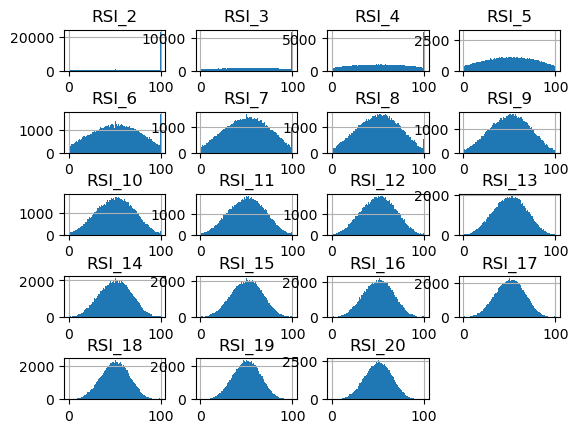

In [89]:
#make histograms for each rsi period
rsis.hist(bins = 100)
plt.subplots_adjust(left = None, bottom = None, top = None, wspace = None, hspace = 1)
plt.show()

<Axes: >

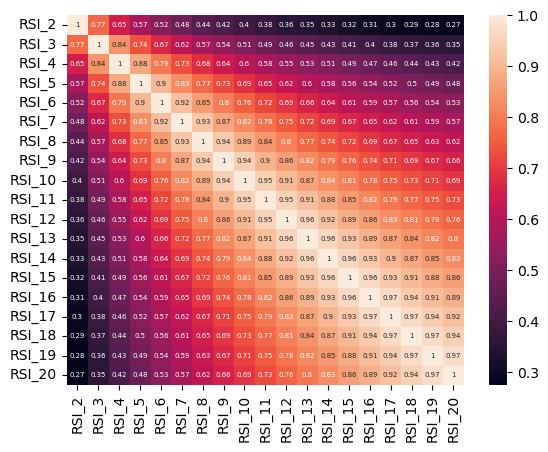

In [91]:
#heatmap
sns.heatmap(rsis.corr(), annot = True, annot_kws={"size": 5})

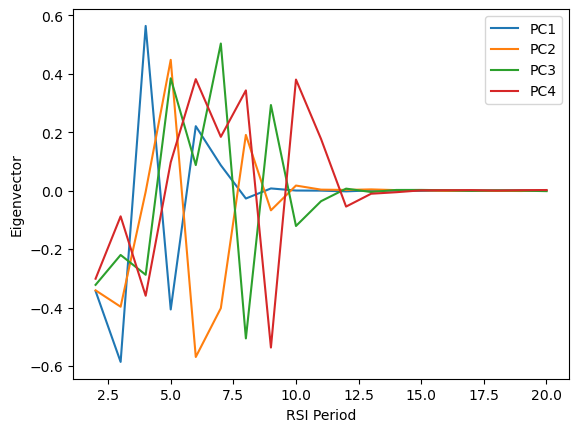

,PC1,PC2,PC3,PC4
date,,,,
2010-01-05,24.739180,56.670501,11.202812,-10.705405
2010-01-06,24.739180,56.670501,11.202812,-10.705405
2010-01-07,24.739180,56.670501,11.202812,-10.705405
2010-01-08,-15.767273,-3.225162,-10.000164,-11.836411
2010-01-11,-17.417676,-26.128628,-26.972826,-24.272349
...,...,...,...,...
2025-02-11,-0.560987,-7.852069,-2.032302,-2.518967
2025-02-12,-29.694957,-34.077423,3.258446,10.000218
2025-02-13,19.707812,-15.316448,-9.007562,5.587099


In [93]:
#subtract the average rsis from the rsis
rsi_mean = rsis.mean()
rsis -= rsi_mean
rsis = rsis.dropna()

#find the cov matrix where columns are rsi periods and rows are dates
cov = np.cov(rsis, rowvar = False)
#find eigenvalues and eigenvectors
evals, evecs = la.eigh(cov)

#sort evals in decsending order and sort the evecs according to the same order as the evals
#largest eval corresponds to the most significant principal component
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

#decided to keep 4 princ comps but can change
#initialize pca data frame
num_comps = 4
rsi_pca = pd.DataFrame()

#calculate dot product between rsis and evecs to get the pc values by date (projecting rsis onto ith pc for each date)
for i in range(num_comps):
    rsi_pca['PC' + str(i+1)] = pd.Series(np.dot(rsis, evecs[i]), index = rsis.index)

#loop through num_comps and plot corresponding evecs to show the weight of each period on each pc
for j in range(num_comps):
    pd.Series(evecs[j], index = rsi_periods).plot(label = 'PC' + str(j+1))

plt.xlabel('RSI Period')
plt.ylabel('Eigenvector')
plt.legend()
plt.show()
rsi_pca

In [95]:
#pca linear model function 
def pca_linear(x: pd.DataFrame, y: pd.Series, num_comps: int, thresh: float = 0.01):
    #zero data, find cov, evals, and sort (same as above).
    means = x.mean()
    x -= means
    x = x.dropna()

    #change rsis to x?
    cov = np.cov(rsis, rowvar = False)
    evals, evecs = la.eigh(cov)

    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]

    #initialize df for model_data to be stored. 
    model_data = pd.DataFrame()
    for i in range(num_comps):
        model_data['PC' + str(i+1)] = pd.Series(np.dot(x, evecs[i]), index = x.index)

    #create a list of columns for the PCs
    columns = list(model_data.columns)
    model_data['target'] = y
    #find coefficients from least squares to minimize the least squares error
    coefs = la.lstsq(model_data[columns], y)[0]
    #get dot product of the pcs and model coefficients.
    model_data['prediction'] = np.dot(model_data[columns], coefs)

    #threshold for long and short positions based on predictions. 
    long = model_data['prediction'].quantile(0.99)
    short = model_data['prediction'].quantile(0.01)

    return coefs, means, long, short, model_data

In [111]:
def walk_forward(op_hi_lo_cl: pd.DataFrame, lookbacks: List[int], train_size: int, step_size: int, num_comps: int = 2, lookahead: int = 6):
    rsis = pd.DataFrame()
    for i in lookbacks:
        rsis[i] = calculate_rsi(op_hi_lo_cl['close'], i)

    #set warm up period as twice the lookback length before training
    warm_up = max(lookbacks) * 2
    #set point of first model training 
    next_training = warm_up + train_size
    #compute log closing price change over the lookahead period and shift to predict future price change
    target = np.log(op_hi_lo_cl['close']).diff(lookahead).shift(-lookahead)
    target = target.drop_duplicates()

    model_pred = np.zeros(len(op_hi_lo_cl))
    thresh_l = np.zeros(len(op_hi_lo_cl))
    thresh_s = np.zeros(len(op_hi_lo_cl))
    signal = np.zeros(len(op_hi_lo_cl))
    model_pred[:] = np.nan
    thresh_l[:] = np.nan
    thresh_s[:] = np.nan

    #initialize variables for PCA
    rsi_means = None
    evecs = None
    coefs = None
    long = None 
    short = None 

    for i in range(next_training, len(op_hi_lo_cl)):
        if i == next_training:
            train_data = rsis.iloc[i - train_size: i + 1 - lookahead].copy()
            train_data = train_data.loc[~train_data.index.duplicated(keep='first')]
            y = target.reindex(train_data.index).drop_duplicates()

            #perform PCA on training data and fit the model to predict y
            coefs, evecs, rsi_means, long, short = pca_linear(train_data, y, num_comps)
            next_training += step_size

        #center the current rows rsis by subtracting the average found in training
        row = rsis.iloc[i] - rsi_means
        vec = np.zeros(num_comps)

        #project row onto first n PCs and store in vec
        for j in range(num_comps):
            vec[j] = np.dot(row, evecs[j])
        #make predictions by taking dot prod of vector of PCs and the model coefficients
        current_pred = np.dot(vec, coefs)
        model_pred[i] = current_pred
        thresh_l = long
        thresh_s = short

        #generate buy sell signals
        if current_pred > long:
            signal[i] = 1
        elif current_pred < short:
            signal[i] = -1

    output_df = pd.DataFrame(index = op_hi_lo_cl.index)
    output_df['prediction'] = model_pred
    output_df['long threshold'] = thresh_l
    output_df['short threshold'] = thresh_s
    output_df['signal'] = signal
    output_df['signal'] = output_df['signal'].rolling(lookahead).mean()
    return output_df
    

In [113]:
if __name__ == '__main__':
    data_raw = pd.read_csv('example_ms.csv')
    data_ff = data_raw.fillna(method = 'ffill')
    data_bf = data_ff.fillna(method = 'bfill')
    data = data_bf.dropna()
    #Convert date column to datetime and index by date
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')

    lookahead = 6
    output = walk_forward(data, list(range(2,25)), 252*2, 252, num_comps = 3, lookahead = lookahead)
    output['t'] = np.log(data['close']).diff(lookahead).shift(-lookahead)

    print('mean target above long threshold', output[output['prediction'] > output['long threshold']]['t'].mean())
    print('mean target below short threshold', output[output['prediction'] < output['short threshold']]['t'].mean())

    next_ret = np.log(data['close'].diff().shift(-1))
    data['strat_returns'] = next_ret * output['signal']
    profit_factor = data[data['strat_returns'] > 0]['strat_returns'].sum() / data[data['strat_returns'] < 0]['strat_returns'].abs().sum()
    print('profit factor', profit_factor)
    data['strat_returns'].cumsum().plot()
    

C:\Users\erica\AppData\Local\Temp\ipykernel_10520\4143393391.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ff = data_raw.fillna(method = 'ffill')
C:\Users\erica\AppData\Local\Temp\ipykernel_10520\4143393391.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bf = data_ff.fillna(method = 'bfill')


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
target = np.log(data['close']).diff(6).shift(-6)
rsis['target'] = target
rsis = rsis.dropna()
target = rsis['target']
rsis = rsis.drop('target', axis = 1)
